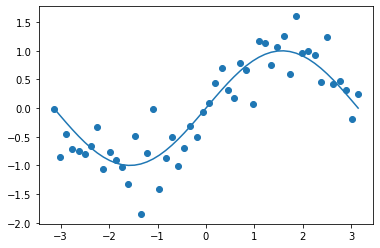

In [3]:

import numpy as np 
import matplotlib.pylab as plt 

X = np.linspace(-np.pi, np.pi)
T = np.sin(X)

plt.plot(X, T)

T += 0.4*np.random.randn(len(X)) #正規分布に従うノイズ

X /= np.pi # 収束しやすくするため、Xの範囲を-1から1の間に納める
eta = 0.01 #学習係数


--- 1次元多項式---
<ipython-input-1-6a87d7c16392>:55: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(X, Y, Linestyle = "dashed")


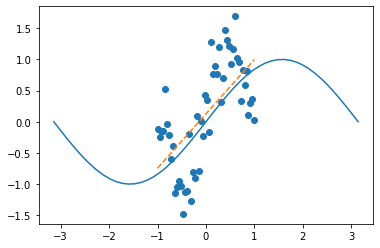

--- 3次元多項式---
<ipython-input-1-6a87d7c16392>:55: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(X, Y, Linestyle = "dashed")


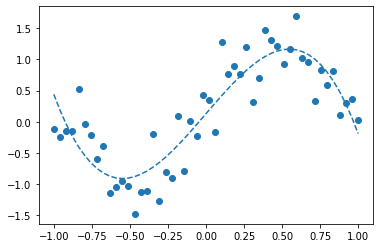

--- 6次元多項式---
<ipython-input-1-6a87d7c16392>:55: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(X, Y, Linestyle = "dashed")


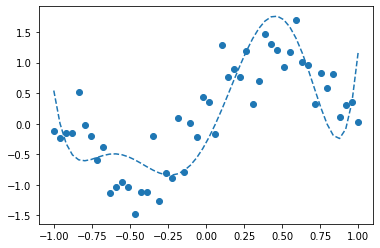

In [1]:

import numpy as np 
import matplotlib.pylab as plt 

X = np.linspace(-np.pi, np.pi)
T = np.sin(X)

plt.plot(X, T)

T += 0.4*np.random.randn(len(X)) #正規分布に従うノイズ

X /= np.pi # 収束しやすくするため、Xの範囲を-1から1の間に納める
eta = 0.01 #学習係数

# --- 多項式 ---
def polynominal(x, params):
    poly = 0
    for i in range(len(params)):
        poly += params[i]*x**i #　式１
    return poly

# --- 各パラメータの勾配
def grad_params(X, T, params):
    grad_ps = np.zeros(len(params))
    for i in range(len(params)):
        for j in range(len(X)):
            grad_ps[i] += (polynominal(X[j], params) - T[j]) * X[j]**i

    return grad_ps

# --- 学習 ---
def fit(X, T, degree, epoch):
    # degree: 多項式の字数, epoch: 繰り返し回数

    # --- パラメータの初期値を設定　 ---
    params = np.random.randn(degree + 1)
    for i in range(len(params)):
        params[i] *= 2**i
    #　高次の項ほどパラメータの初期値を大きくする

    # --- パラメータ
    for i in range(epoch):
        params -= eta * grad_params(X, T, params) # 式4
    
    return params

#--- 結果の表示 ---
degrees = [1, 3, 6]

for degree in degrees:
    print("--- " + str(degree) + "次元多項式---")
    params = fit(X, T, degree, 1000)
    Y = polynominal(X, params)

    plt.scatter(X, T)
    plt.plot(X, Y, Linestyle = "dashed")
    plt.show()

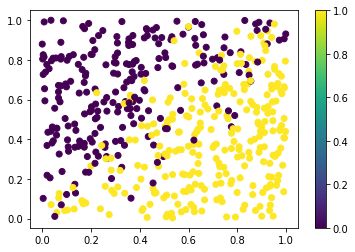

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

n_data = 500 # データ数
X = np.zeros((n_data, 2 )) # 入力
T = np.zeros((n_data)) #正解

for i in range(n_data):
    # x, y座標をランダムに設定する
    x_rand = np.random.rand() # x座標
    y_rand = np.random.rand() # y座標
    X[i, 0] = x_rand
    X[i, 1] = y_rand

    # xがyより大きい領域では正解ラベルを1にする。境界正規分布を使って少しぼかす
    if x_rand > y_rand + 0.2 * np.random.randn():
        T[i] = 1
plt.scatter(X[:,0], X[:, 1], c=T) #正解ラベルを色で表す
plt.colorbar()
plt.show()

--- 確率分布 ---


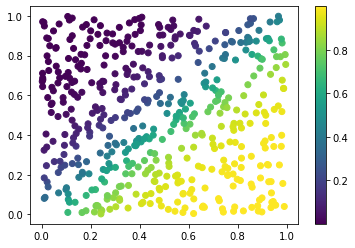

--- 誤差の推移 ---


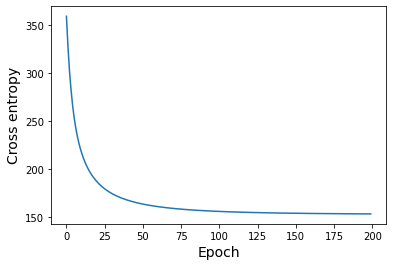

In [24]:
import numpy as np 
import matplotlib.pyplot as plt 

eta = 0.01 # 学習係数

n_data = 500 # データ数
X = np.zeros((n_data, 2 )) # 入力
T = np.zeros((n_data)) #正解

for i in range(n_data):
    # x, y座標をランダムに設定する
    x_rand = np.random.rand() # x座標
    y_rand = np.random.rand() # y座標
    X[i, 0] = x_rand
    X[i, 1] = y_rand

    # xがyより大きい領域では正解ラベルを1にする。境界正規分布を使って少しぼかす
    if x_rand > y_rand + 0.2 * np.random.randn():
        T[i] = 1

# --- 出力を計算 ---
def classify(x, a_params, b_param):
    u = np.dot(x, a_params) + b_param #式４
    return 1/(1+np.exp(-u)) #式4

# --- 交差エントロピー誤差 ---
def cross_entropy(Y, T):
    delta = 1e-7 #微小な値
    return -np.sum(T*np.log(Y+delta) + (1-T)*np.log(1-Y + delta))

# --- 各パラメータの勾配 ---
def grad_a_params(X, T, a_params, b_param): #a1, a2,....の勾配
    grad_a = np.zeros(len(a_params))
    for i in range(len(a_params)):
        for j in range(len(X)):
            grad_a[i] += (classify(X[j],a_params, b_param) - T[j])*X[j, i]
    
    return grad_a

def grad_b_param(X, T, a_params, b_param):
    grad_b = 0
    for i in range(len(X)):
        grad_b += (classify(X[i], a_params, b_param) - T[i])
    
    return grad_b

#--- 学習 ---
error_x = [] #　誤差の記録用
error_y = [] # 誤差の記録用
def fit(X, T, dim, epoch): # dim:入力の次元、epoch: 繰り返し回数
    # --- パラメータの初期設定 ---
    a_params = np.random.randn(dim)
    b_param  = np.random.randn()

    #--- パラメータの更新 ---
    for i in range(epoch):
        grad_a = grad_a_params(X, T, a_params, b_param)
        grad_b = grad_b_param(X, T, a_params, b_param)
        a_params -= eta * grad_a #式2
        b_param  -= eta * grad_b #式２

        Y = classify(X, a_params, b_param)
        error_x.append(i) #誤差の記録
        error_y.append(cross_entropy(Y, T)) #誤差の記録

    return (a_params, b_param)

# --- 確率分布の表示 ---
a_params, b_param = fit(X, T, 2, 200)#学習
Y = classify(X, a_params, b_param) # 学習後のパラメータ

result_x = [] # x座標
result_y = [] # y座標
result_z = [] # 確率

for i in range(len(Y)):
    result_x.append(X[i,0])
    result_y.append(X[i,1])
    result_z.append(Y[i])

print("--- 確率分布 ---")
plt.scatter(result_x, result_y, c=result_z)

#確率を色で表示
plt.colorbar()
plt.show()

# --- 誤差の推移 ---
print("--- 誤差の推移 ---")
plt.plot(error_x, error_y)
plt.xlabel("Epoch", size = 14)　　
plt.ylabel("Cross entropy", size = 14)
plt.show()
